In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [3]:
base_dir = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Feature_matrix\AIS\\'
os.chdir(base_dir)

In [4]:
# Load the datasets
X_train = np.load(base_dir + 'X_train.npy')
X_val = np.load(base_dir + 'X_val.npy')
X_test = np.load(base_dir + 'X_test.npy')
y_train = np.load(base_dir + 'y_train.npy')
y_val = np.load(base_dir + 'y_val.npy')
y_test = np.load(base_dir + 'y_test.npy')

In [5]:
# Reshape X_train to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("New shape of X_train:", X_train.shape)

New shape of X_train: (34654, 1, 6)


In [6]:
# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
# Define the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), strides=1, kernel_regularizer=l1(0.01)))
model.add(Flatten())
model.add(Dense(50, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(1))

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.006793806619350815), 
              loss='mean_squared_error', 
              metrics=['mse', rmse, 'mae', 'mape'])

In [9]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 64)             448       
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3749 (14.64 KB)
Trainable params: 3749 (14.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)

In [11]:
# Fit the model
history = model.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping])

Epoch 1/100
1083/1083 [==============================] - 2s 2ms/step - loss: 125149.0859 - mse: 125137.7734 - rmse: 345.5350 - mae: 228.2647 - mape: 3835970304.0000 - val_loss: 113151.8984 - val_mse: 113139.3281 - val_rmse: 328.9260 - val_mae: 209.9858 - val_mape: 3024293120.0000
Epoch 2/100
1083/1083 [==============================] - 2s 1ms/step - loss: 110749.0703 - mse: 110735.1484 - rmse: 326.8636 - mae: 212.8221 - mape: 3286656768.0000 - val_loss: 105179.9766 - val_mse: 105164.9766 - val_rmse: 318.0223 - val_mae: 208.6862 - val_mape: 3309068032.0000
Epoch 3/100
1083/1083 [==============================] - 2s 2ms/step - loss: 104885.2891 - mse: 104869.5859 - rmse: 318.1485 - mae: 204.0998 - mape: 2892937984.0000 - val_loss: 101206.8594 - val_mse: 101190.5391 - val_rmse: 310.7681 - val_mae: 195.9659 - val_mape: 2968458752.0000
Epoch 4/100
1083/1083 [==============================] - 2s 1ms/step - loss: 100035.3984 - mse: 100018.2031 - rmse: 310.6517 - mae: 196.9600 - mape: 26700508

1083/1083 [==============================] - 2s 1ms/step - loss: 85477.2422 - mse: 85445.0234 - rmse: 285.7036 - mae: 178.5051 - mape: 2210987520.0000 - val_loss: 85413.8281 - val_mse: 85381.3984 - val_rmse: 285.3040 - val_mae: 180.9954 - val_mape: 2463849728.0000
Epoch 31/100
1083/1083 [==============================] - 2s 1ms/step - loss: 85128.0000 - mse: 85095.4141 - rmse: 285.6944 - mae: 178.7005 - mape: 2220101120.0000 - val_loss: 85122.6406 - val_mse: 85089.9062 - val_rmse: 284.6930 - val_mae: 181.3998 - val_mape: 2119597568.0000
Epoch 32/100
1083/1083 [==============================] - 2s 2ms/step - loss: 85029.1250 - mse: 84996.2969 - rmse: 285.7100 - mae: 178.0160 - mape: 2247336192.0000 - val_loss: 84554.6094 - val_mse: 84521.6172 - val_rmse: 284.0914 - val_mae: 181.7512 - val_mape: 2711765760.0000
Epoch 33/100
1083/1083 [==============================] - 2s 1ms/step - loss: 85052.8594 - mse: 85019.7656 - rmse: 285.4924 - mae: 177.9693 - mape: 2206749440.0000 - val_loss: 829

In [12]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

233/233 [==============================] - 0s 973us/step - loss: 80016.9922 - mse: 79980.4531 - rmse: 276.3426 - mae: 171.8511 - mape: 2189067520.0000
Test Loss: [80016.9921875, 79980.453125, 276.3426208496094, 171.8511199951172, 2189067520.0]


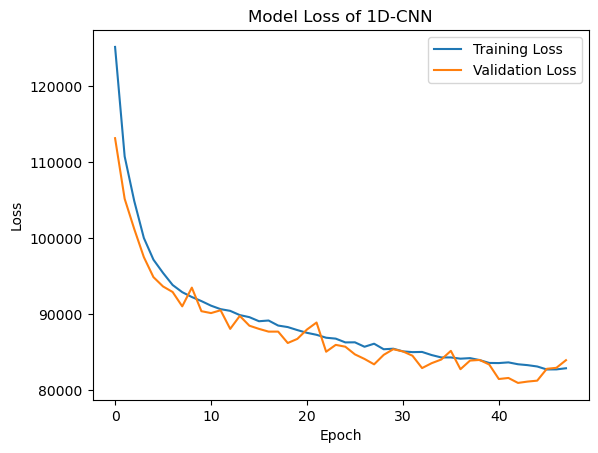

In [13]:
# History is the output of the model.fit() method
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss of 1D-CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(X_test).flatten()  # Flatten predictions to ensure it's a 1D array
y_test_flattened = y_test.flatten()  # Flatten actual values for consistency

233/233 [==============================] - 0s 880us/step


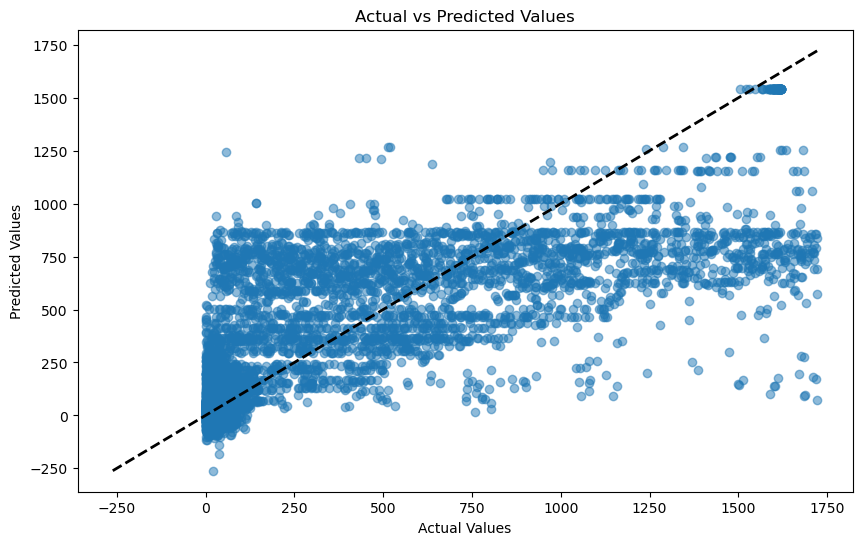

In [15]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_flattened, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Plot a line of perfect predictions for reference
max_val = max(y_test_flattened.max(), y_pred.max())
min_val = min(y_test_flattened.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2)  # Black dashed line for perfect predictions

plt.show()

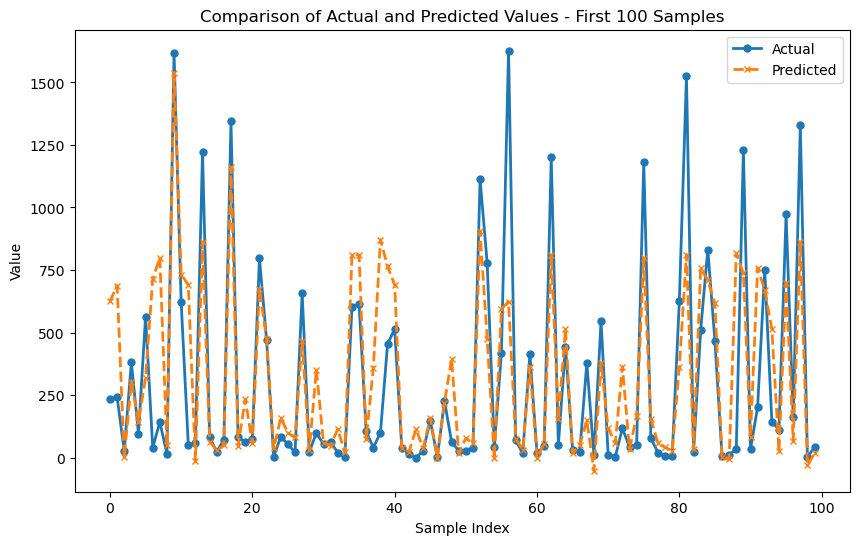

In [16]:
# Plotting a line plot for a clearer comparison for a subset
plt.figure(figsize=(10, 6))
plt.plot(y_test_flattened[:100], marker='o', label='Actual', linewidth=2, markersize=5)
plt.plot(y_pred[:100], marker='x', linestyle='--', label='Predicted', linewidth=2, markersize=5)
plt.title('Comparison of Actual and Predicted Values - First 100 Samples')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

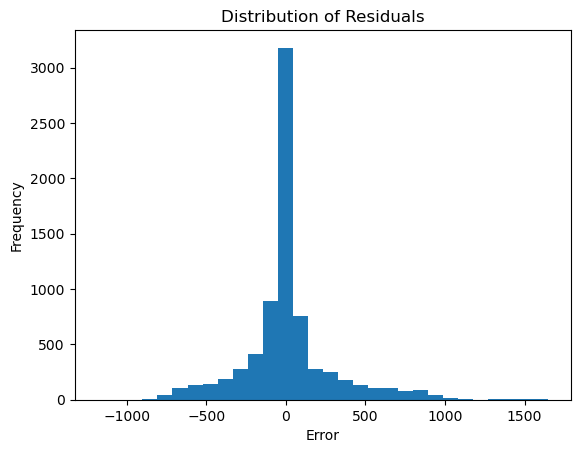

In [17]:
# Calculating residuals
residuals = y_test - y_pred.squeeze()  # Adjust dimensions if necessary

# Plotting the histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [18]:
# Evaluate the model
loss, mse, rmse, mae, mape = model.evaluate(X_test, y_test)
print("Test loss (MSE):", loss)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

233/233 [==============================] - 0s 1ms/step - loss: 80016.9922 - mse: 79980.4531 - rmse: 276.3426 - mae: 171.8511 - mape: 2189067520.0000
Test loss (MSE): 80016.9921875
Mean Squared Error (MSE): 79980.453125
Root Mean Squared Error (RMSE): 276.3426208496094
Mean Absolute Error (MAE): 171.8511199951172
Mean Absolute Percentage Error (MAPE): 2189067520.0


### Hyperparameter Tuning 

In [19]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [20]:
sequence_length = 100 
num_features = 10 
input_shape = (sequence_length, num_features)

In [21]:
def build_model_cnn(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=512, step=32),
        kernel_size=hp.Choice('kernel_size', values=[3, 5, 7]),
        activation='relu',
        input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
        activation='relu'))
    model.add(Dense(1, activation='linear'))  # Adjust the activation function as per your problem's need

    # Hyperparameters for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_squared_error',  # Adjust the loss function as per your problem's need
        metrics=['mse', 'mae', 'mape']
    )

    return model

In [22]:
# Set up the tuner for the CNN model
tuner_cnn = kt.RandomSearch(
    build_model_cnn,
    objective='val_mse',  
    max_trials=10,        
    executions_per_trial=3, 
    directory='my_dir_cnn',    
    project_name='1d_cnn'
)

In [23]:
tuner_cnn.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Trial 2 Complete [00h 00m 00s]

Best val_mse So Far: None
Total elapsed time: 00h 00m 00s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
192               |416               |filters
3                 |3                 |kernel_size
32                |96                |dense_units
0.0096443         |0.00057943        |learning_rate

Epoch 1/10


Traceback (most recent call last):
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anacon

RuntimeError: Number of consecutive failures exceeded the limit of 3.
Traceback (most recent call last):
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 273, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 238, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 314, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\tuner.py", line 233, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras_tuner\src\engine\hypermodel.py", line 149, in fit
    return model.fit(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "C:\Users\firoj\AppData\Local\Temp\__autograph_generated_filee6y1_in0.py", line 18, in tf__train_function
    raise
ValueError: in user code:

    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\firoj\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 100, 10), found shape=(None, 1, 6)



In [ ]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Filters: {best_hps.get('filters')}")
print(f"Best Kernel Size: {best_hps.get('kernel_size')}")
print(f"Best Dense Units: {best_hps.get('dense_units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")